In [1]:
# manipulations
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# math
from scipy import stats
import statistics
import math

# SQL access
from env import host, user, password

# local files
from acquire import get_telco_data
from prepare import prep_telco, telco_split

# sklearn suite
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Overall:
1. Setup github repo - done
2. Do initial planning stage of pipeline - done
3. Create acquire module - done 
4. Create local env, check .gitignore - done
5. Create prepare module - done
6. Create train, validate, test split - done
7. Explore the train set - 
8. Create models with train set
9. Select best models and use validate test
10. Create a csv with best model on test set
11. Report conclusions, summary, recommendations

## Planning:

Goal - Identify drivers of churn, create models that address this, predict churn

Deliverables - modules to interact with data (wrangling), workbook to see flow, final product to present to audience; README.md, Final_Report.ipynb, acquire.py & prepare.py, Predictions.csv, workbooks, etc..

Questions:
- End products: Github repo with emphasis on readme and final notebook
- Format: mix of vscode and notebook
- Audience: both non-data scientist oriented and peer oriented depending on section
       - Emphasis on 'business decision' audience of executives at Telco
- Use: To reduce Telco churn
- MVP: Identified factors of churn, creatioin of a classification model that can predict churn, recommendations for        using model/reducing churn
       - Final model must beat baseline (would hope for significant improvement), must be able to provide options          for reducing churn

- Initial Data centric questions:
    - What are my key drivers of churn? 
    - Does type of service impact churn?
    - Does internet type impact churn?
    - Do demographic attributes impact churn?
    - Does cost impact churn?
    - Does tenure impact churn?
    
- Initial business centric questions:
    - What is the cost of churn by:
        - Customer breakdown? (CLV)
        - Margins of profit by service or internet type?

## Acquisition:

In [2]:
df = get_telco_data()
df.head()

Using cached csv


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [3]:
df.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Preparation:

In [5]:
# End outcome
train, validate, test = prep_telco(df)

In [6]:
train.shape, validate.shape, test.shape

((3937, 32), (1688, 32), (1407, 32))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   tenure                                 3937 non-null   int64  
 3   monthly_charges                        3937 non-null   float64
 4   total_charges                          3937 non-null   float64
 5   gender_Male                            3937 non-null   uint8  
 6   partner_Yes                            3937 non-null   uint8  
 7   dependents_Yes                         3937 non-null   uint8  
 8   phone_service_Yes                      3937 non-null   uint8  
 9   multiple_lines_No phone service        3937 non-null   uint8  
 10  multiple_lines_Yes                     3937 non-null   uint8  
 11  o

In [8]:
train.isnull().sum()

customer_id                              0
senior_citizen                           0
tenure                                   0
monthly_charges                          0
total_charges                            0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phone_service_Yes                        0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_protection_No internet service    0
device_protection_Yes                    0
tech_support_No internet service         0
tech_support_Yes                         0
streaming_tv_No internet service         0
streaming_tv_Yes                         0
streaming_movies_No internet service     0
streaming_movies_Yes                     0
paperless_b

### Prep Breakdown:

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [11]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7032 non-null   object 
 1   gender                 7032 non-null   object 
 2   senior_citizen         7032 non-null   int64  
 3   partner                7032 non-null   object 
 4   dependents             7032 non-null   object 
 5   tenure                 7032 non-null   int64  
 6   phone_service          7032 non-null   object 
 7   multiple_lines         7032 non-null   object 
 8   online_security        7032 non-null   object 
 9   online_backup          7032 non-null   object 
 10  device_protection      7032 non-null   object 
 11  tech_support           7032 non-null   object 
 12  streaming_tv           7032 non-null   object 
 13  streaming_movies       7032 non-null   object 
 14  paperless_billing      7032 non-null   object 
 15  mont

In [14]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']

In [15]:
cat_col.remove('customer_id')

In [16]:
cat_col

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [17]:
for col in cat_col:
    print(df[col].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: partner, dtype: int64
No     4933
Yes    2099
Name: dependents, dtype: int64
Yes    6352
No      680
Name: phone_service, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64
No                     2781
Yes                    2731
No internet servic

In [18]:
for col in cat_col:
    dummy_df = pd.get_dummies(df[col],
                              prefix = df[col].name,
                              drop_first=True,
                              dummy_na=False)
    df = pd.concat([df, dummy_df], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7032 non-null   object 
 1   gender                                 7032 non-null   object 
 2   senior_citizen                         7032 non-null   int64  
 3   partner                                7032 non-null   object 
 4   dependents                             7032 non-null   object 
 5   tenure                                 7032 non-null   int64  
 6   phone_service                          7032 non-null   object 
 7   multiple_lines                         7032 non-null   object 
 8   online_security                        7032 non-null   object 
 9   online_backup                          7032 non-null   object 
 10  device_protection                      7032 non-null   object 
 11  tech

In [20]:
for col in cat_col:
        df = df.drop(columns=col)

In [21]:
df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,...,0,1,1,1,0,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,0,...,1,1,1,1,0,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,0,...,0,1,1,1,0,0,0,0,0,1


In [22]:
train, validate, test = telco_split(df)

In [23]:
train.shape, validate.shape, test.shape

((3937, 32), (1688, 32), (1407, 32))

In [24]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,0,58,71.10,4299.20,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,0,71,85.45,6028.95,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,0
5054,7107-UBYKY,0,35,25.75,882.55,0,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
2355,3373-YZZYM,0,1,19.20,19.20,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
6279,8883-GRDWQ,1,20,54.00,1055.90,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   tenure                                 3937 non-null   int64  
 3   monthly_charges                        3937 non-null   float64
 4   total_charges                          3937 non-null   float64
 5   gender_Male                            3937 non-null   uint8  
 6   partner_Yes                            3937 non-null   uint8  
 7   dependents_Yes                         3937 non-null   uint8  
 8   phone_service_Yes                      3937 non-null   uint8  
 9   multiple_lines_No phone service        3937 non-null   uint8  
 10  multiple_lines_Yes                     3937 non-null   uint8  
 11  o

## Exploration:

What does the data actually have to tell us? 

Question 1: What is our baseline situation on churn?

Question 2: What does the correlation heatmap look like?
                - Narrow down some key drivers of churn
                
Question 3: What is the breakdown of service type and churn? 

Question 4: How do some demographics impact churn?

Question 5: How does internet type impact churn?

Question 6: How does contract type impact churn?

Question 7: How does payment type impact churn?

Question 8: How does tenure impact churn?

In [26]:
alpha = .05 # for all statistical analysis will set alpha to .05

In [27]:
# Question 1 - Churn baseline
train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [28]:
inputs = [(train.churn_Yes.value_counts())[0], (train.churn_Yes.value_counts())[1]]
labels = ['No Churn', 'Churn']

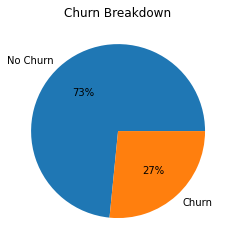

In [29]:
plt.pie(inputs, labels=labels, autopct = '%.0f%%')
plt.title('Churn Breakdown')
plt.show()

In [30]:
# ~ 1/4 of customers are churning 

<AxesSubplot:title={'center':'Heatmap'}>

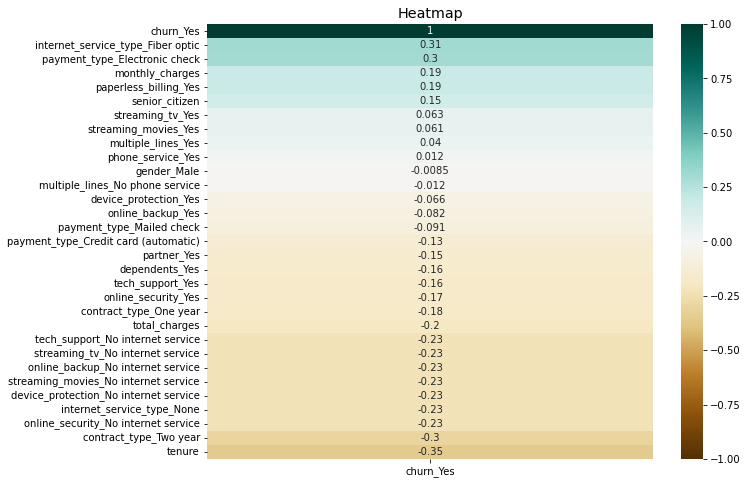

In [31]:
# Question 2 - Correlation heatmap
df2 = df.drop(columns='customer_id')
plt.figure(figsize=(10, 8)) 
plt.title("Heatmap", fontsize = 'x-large')
sns.heatmap(df2.corr()[['churn_Yes']].sort_values(by='churn_Yes', 
    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [32]:
# Drivers to pay attention to for churn:
#     - Fiber, Electronic Check payment
# Drivers to pay attention to for retention:
#     - Tenure length, two year contract

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   tenure                                 3937 non-null   int64  
 3   monthly_charges                        3937 non-null   float64
 4   total_charges                          3937 non-null   float64
 5   gender_Male                            3937 non-null   uint8  
 6   partner_Yes                            3937 non-null   uint8  
 7   dependents_Yes                         3937 non-null   uint8  
 8   phone_service_Yes                      3937 non-null   uint8  
 9   multiple_lines_No phone service        3937 non-null   uint8  
 10  multiple_lines_Yes                     3937 non-null   uint8  
 11  o

### Additional prep:
For ease of df manipulation going to drop some of the less useful columns

In [34]:
train2 = train.drop(columns=['partner_Yes', 'gender_Male', 'dependents_Yes', 'senior_citizen'])

In [35]:
train2 = train2.drop(columns=['multiple_lines_No phone service', 'multiple_lines_Yes'])

<AxesSubplot:title={'center':'Heatmap'}>

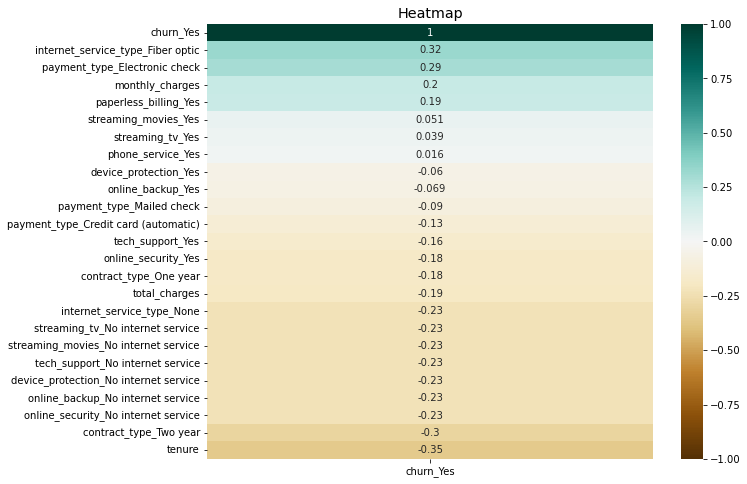

In [36]:
plt.figure(figsize=(10, 8)) 
plt.title("Heatmap", fontsize = 'x-large')
sns.heatmap(train2.corr()[['churn_Yes']].sort_values(by='churn_Yes', 
    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [37]:
train2.head(2)

,customer_id,tenure,monthly_charges,total_charges,phone_service_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,58,71.10,4299.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,71,85.45,6028.95,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


#### Question 4 - demographics (senior, dependents, etc...) 
From the corr. heatmap we have weeded out most of the demographics and will focus on the service, internet type, payment type, etc... these seem to indicate a much more accurate churn prediction than the attributes of the customer themselves

### Back to exploration:
##### Question 3 - Service type and churn (Just Phone, Just Internet, Phone & Internet)

In [38]:
train2.head(2)

,customer_id,tenure,monthly_charges,total_charges,phone_service_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,58,71.10,4299.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,71,85.45,6028.95,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [39]:
train_service = train2[['churn_Yes', 'phone_service_Yes', 'internet_service_type_Fiber optic', 'internet_service_type_None']]

In [40]:
train_service.head(2)

,churn_Yes,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None
5919,0,1,0,0
1915,0,1,1,0


In [41]:
train_service.internet_service_type_None.value_counts()

0    3070
1     867
Name: internet_service_type_None, dtype: int64

In [42]:
train_service.phone_service_Yes.value_counts()

1    3564
0     373
Name: phone_service_Yes, dtype: int64

In [43]:
telco = get_telco_data()

Using cached csv


In [44]:
telco.head(2)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check


In [45]:
train_service['internet_type'] = telco.internet_service_type

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/1333461217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_service['internet_type'] = telco.internet_service_type


In [46]:
phone_serv = pd.crosstab(train_service.phone_service_Yes, train_service.churn_Yes)

<AxesSubplot:xlabel='phone_service_Yes'>

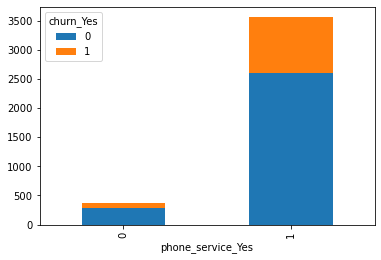

In [47]:
phone_serv.plot(kind='bar', stacked=True)

In [48]:
# 'Just Internet' is not nearly as imoprtant as plans that do have a phone component

In [49]:
train_service['int_phone'] = ((train_service.phone_service_Yes == 1) & (train_service.internet_service_type_None == 0))

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/4090003085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_service['int_phone'] = ((train_service.phone_service_Yes == 1) & (train_service.internet_service_type_None == 0))


In [50]:
train_service.int_phone = train_service.int_phone.astype(int)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
int_phone_cross = pd.crosstab(train_service.int_phone, train_service.churn_Yes)

<AxesSubplot:xlabel='int_phone'>

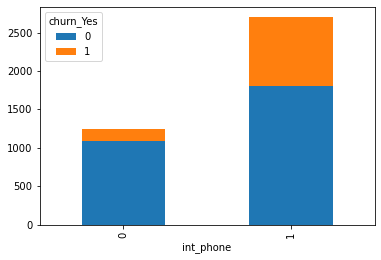

In [52]:
int_phone_cross.plot(kind='bar', stacked=True)

In [53]:
# 'Just Phone' or 'Just Internet' are not nearly as important as plans that have both Phone and Internet

#### Question 5: How does internet type impact churn?

In [54]:
int_type = pd.crosstab(train_service.internet_type, train_service.churn_Yes)

<AxesSubplot:xlabel='internet_type'>

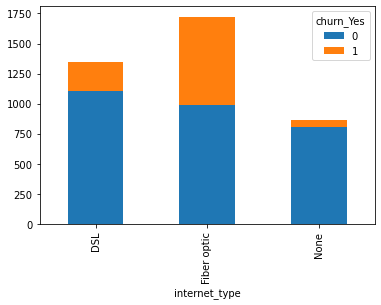

In [55]:
int_type.plot(kind='bar', stacked=True)

In [56]:
# So out of service type and internet type we can see that the biggest impact is from those with Phone & Internet w/ Fiber
# Note: Fiber type always has Phone & Internet as service

In [57]:
# H0: Fiber with phone & internet service churn == DSL with phone & internet service churn
# HA: Fiber (w/ phone/internet) churn != DSL (w/ phone/internet) churn

In [58]:
fiber_c = train_service[train_service.internet_type == 'Fiber optic'].churn_Yes
dsl_c = train_service[(train_service.internet_type == 'DSL') & (train_service.int_phone == 1)].churn_Yes

In [59]:
t, p = stats.ttest_ind(fiber_c, dsl_c)
t, p

(14.706037923681496, 3.771093019475315e-47)

#### Our p value is below our alpha (.05) and we can therefore reject the null hypothesis and confirm that the churn for fiber and dsl are not equal. This reinforces our visualization approach. 

In [60]:
train_service.head(2)

,churn_Yes,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None,internet_type,int_phone
5919,0,1,0,0,DSL,1
1915,0,1,1,0,Fiber optic,1


#### Question 6: How does contract type impact churn?

In [61]:
train2.head(2)

,customer_id,tenure,monthly_charges,total_charges,phone_service_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,58,71.10,4299.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,71,85.45,6028.95,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [62]:
train_contract = train2[['churn_Yes', 'contract_type_One year', 'contract_type_Two year']]

In [63]:
train_contract.head(2)

,churn_Yes,contract_type_One year,contract_type_Two year
5919,0,1,0
1915,0,1,0


In [64]:
train_contract['no_contract'] = ((train_contract['contract_type_One year'] == 0) & (train_contract['contract_type_Two year'] == 0))

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/156926966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_contract['no_contract'] = ((train_contract['contract_type_One year'] == 0) & (train_contract['contract_type_Two year'] == 0))


In [65]:
train_contract.no_contract = train_contract.no_contract.astype(int)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
train_contract.head(2)

,churn_Yes,contract_type_One year,contract_type_Two year,no_contract
5919,0,1,0,0
1915,0,1,0,0


In [67]:
contract_cross = pd.crosstab(train_contract.no_contract, train_contract.churn_Yes)

<AxesSubplot:xlabel='no_contract'>

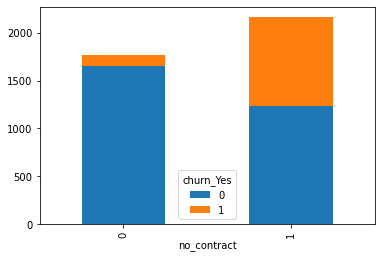

In [68]:
contract_cross.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='contract_type_One year'>

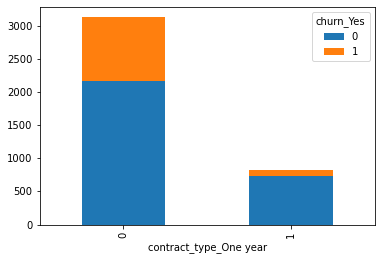

In [69]:
contract_cross1 = pd.crosstab(train_contract['contract_type_One year'], train_contract.churn_Yes)
contract_cross1.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='contract_type_Two year'>

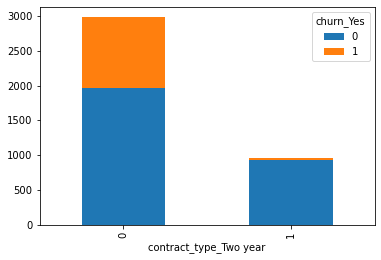

In [70]:
contract_cross2 = pd.crosstab(train_contract['contract_type_Two year'], train_contract.churn_Yes)
contract_cross2.plot(kind='bar', stacked=True)

In [71]:
# The issue of churn lies with those who do not have a contract, let's confirm it with some stats testing

In [72]:
# H0: No contract and churn are independent of one another.
# HA: No contract and churn are not independent of one another.

In [73]:
chi2, p, degf, expected = stats.chi2_contingency(contract_cross)
print('Observed\n')
print(contract_cross.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2: .4f}')
print(f'p. = {p:.4}')
contract_cross

Observed

[[1653  119]
 [1238  927]]
---
Expected

[[1301.20701041  470.79298959]
 [1589.79298959  575.20701041]]
---

chi^2 =  649.1332
p. = 3.448e-143


churn_Yes,0,1
no_contract,,
0,1653,119
1,1238,927


In [74]:
# Based on our above p value we can reject the null hypothesis and conclude that No Contract and churn are not 
# independent of one another. Reinforcing our visualization approach to this factor.

#### Question 7: How does payment type impact churn?

In [75]:
train2.head(2)

,customer_id,tenure,monthly_charges,total_charges,phone_service_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,58,71.10,4299.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,71,85.45,6028.95,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [76]:
train_pay = train2[['churn_Yes', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']]

In [77]:
train_pay.head(2)

,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,1,0,0
1915,0,1,0,0


In [78]:
telco.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [79]:
train_pay['bank transfer auto'] = ((train_pay['payment_type_Credit card (automatic)'] == 0) & (train_pay['payment_type_Electronic check'] == 0) & (train_pay['payment_type_Mailed check'] == 0))

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/835259088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pay['bank transfer auto'] = ((train_pay['payment_type_Credit card (automatic)'] == 0) & (train_pay['payment_type_Electronic check'] == 0) & (train_pay['payment_type_Mailed check'] == 0))


In [80]:
train_pay.head(2)

,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,bank transfer auto
5919,0,1,0,0,False
1915,0,1,0,0,False


In [81]:
train_pay['bank transfer auto'] = train_pay['bank transfer auto'].astype(int)

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/3458198687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pay['bank transfer auto'] = train_pay['bank transfer auto'].astype(int)


In [82]:
train_pay.head(2)

,churn_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,bank transfer auto
5919,0,1,0,0,0
1915,0,1,0,0,0


<AxesSubplot:xlabel='payment_type_Credit card (automatic)'>

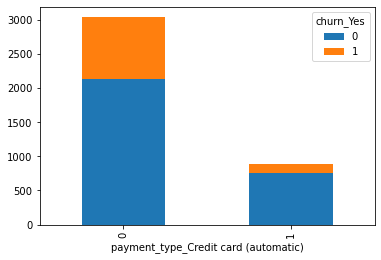

In [83]:
cc_pay = pd.crosstab(train_pay['payment_type_Credit card (automatic)'], train_pay.churn_Yes)
cc_pay.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='payment_type_Electronic check'>

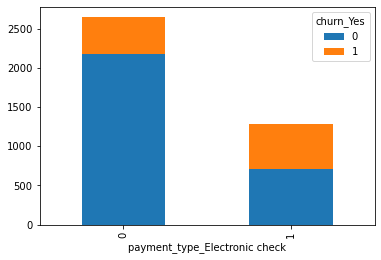

In [84]:
echeck_pay = pd.crosstab(train_pay['payment_type_Electronic check'], train_pay.churn_Yes)
echeck_pay.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='payment_type_Mailed check'>

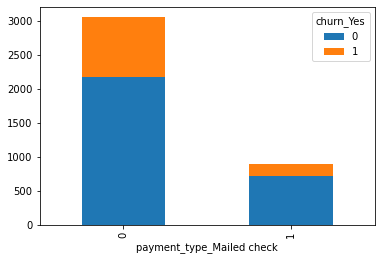

In [85]:
mcheck_pay = pd.crosstab(train_pay['payment_type_Mailed check'], train_pay.churn_Yes)
mcheck_pay.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='bank transfer auto'>

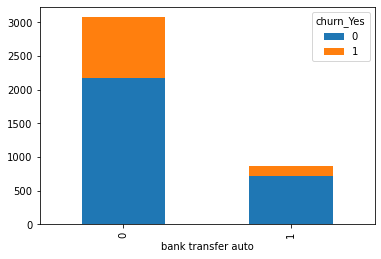

In [86]:
bank_pay = pd.crosstab(train_pay['bank transfer auto'], train_pay.churn_Yes)
bank_pay.plot(kind='bar', stacked=True)

In [87]:
# The strongest impact on churn comes from customers using electronic check as payment type

In [88]:
# H0: Electronic check payment and churn are independent of one another.
# HA: Electronic check payment and churn are not independent of one another.

In [89]:
chi2, p, degf, expected = stats.chi2_contingency(echeck_pay)
print('Observed\n')
print(echeck_pay.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2: .4f}')
print(f'p. = {p:.4}')
echeck_pay

Observed

[[2183  465]
 [ 708  581]]
---
Expected

[[1944.46736093  703.53263907]
 [ 946.53263907  342.46736093]]
---

chi^2 =  334.9798
p. = 7.911e-75


churn_Yes,0,1
payment_type_Electronic check,,
0,2183,465
1,708,581


In [90]:
# Based on our above p value we can reject the null hypothesis and conclude that Electronic check payment and churn
# are not independent of one another. Reinforcing our visualization approach to this factor.

#### Question 8: How does tenure impact churn?

In [92]:
train.tenure.value_counts()

1     351
72    213
2     141
3     112
4     104
     ... 
43     30
51     29
39     29
59     28
36     24
Name: tenure, Length: 72, dtype: int64

In [99]:
ten_churn = train[['churn_Yes', 'tenure']]

In [107]:
ten_churn_cross = pd.crosstab(ten_churn.tenure, ten_churn.churn_Yes)

<AxesSubplot:xlabel='tenure'>

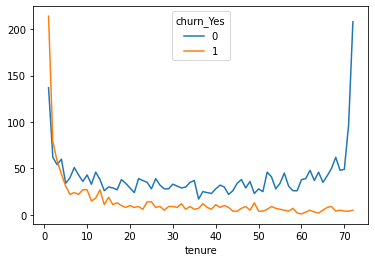

In [115]:
ten_churn_cross.plot()

In [116]:
# As seen there is an issue with churn for customers who have a shorter tenure duration. 

## Overall for exploration we find that our biggest indicators of churn are:
### Fiber (Phone & Internet service)
### No contract
### Electronic check payment
### Low tenure duration (tenure < 10)

## Further exploration options: If I were to continue exploration I would look at how charges (monthly or total) play a role, or the 'package' suit of add-on expenses may contribute to churn. 

In [117]:
train.head(2)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,0,58,71.10,4299.20,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1915,2790-XUYMV,0,71,85.45,6028.95,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,0


In [128]:
# Prior to modeling, removing customer_id from our data

In [122]:
train_cust = train[['customer_id']]

In [124]:
validate_cust = validate[['customer_id']]
test_cust = test[['customer_id']]

In [126]:
train = train.drop(columns='customer_id')
validate = validate.drop(columns='customer_id')
test = test.drop(columns='customer_id')

## Modeling:

In [129]:
# establish our baseline accuracy
train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [130]:
baseline = (train.churn_Yes == 0).mean()
baseline

0.7343154686309372

#### Baseline accuracy: 73.4%

In [131]:
train.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1915,0,71,85.45,6028.95,1,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [132]:
# Our target variable is churn_Yes so we are going to separate our x and y accordingly
x_train = train.drop(columns='churn_Yes')
y_train = train.churn_Yes
x_validate = validate.drop(columns='churn_Yes')
y_validate = validate.churn_Yes
x_test = test.drop(columns='churn_Yes')
y_test = test.churn_Yes

In [133]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [135]:
clf = clf.fit(x_train, y_train)

[Text(558.0, 951.3000000000001, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No churn'),
 Text(279.0, 679.5, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = No churn'),
 Text(139.5, 407.70000000000005, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = No churn'),
 Text(69.75, 135.89999999999998, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = No churn'),
 Text(209.25, 135.89999999999998, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = No churn'),
 Text(418.5, 407.70000000000005, 'total_charges <= 124.475\ngini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = Churn'),
 Text(348.75, 135.89999999999998, 'gini = 0.203\nsamples = 131\nvalue = [15, 116]\nclass = Churn'),
 Text(488.25, 135.89999999999998, 'gini = 0.453\nsamples = 436\nvalue = [151, 285]\nclass = Churn'),
 Text(837.0, 679.5, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nval

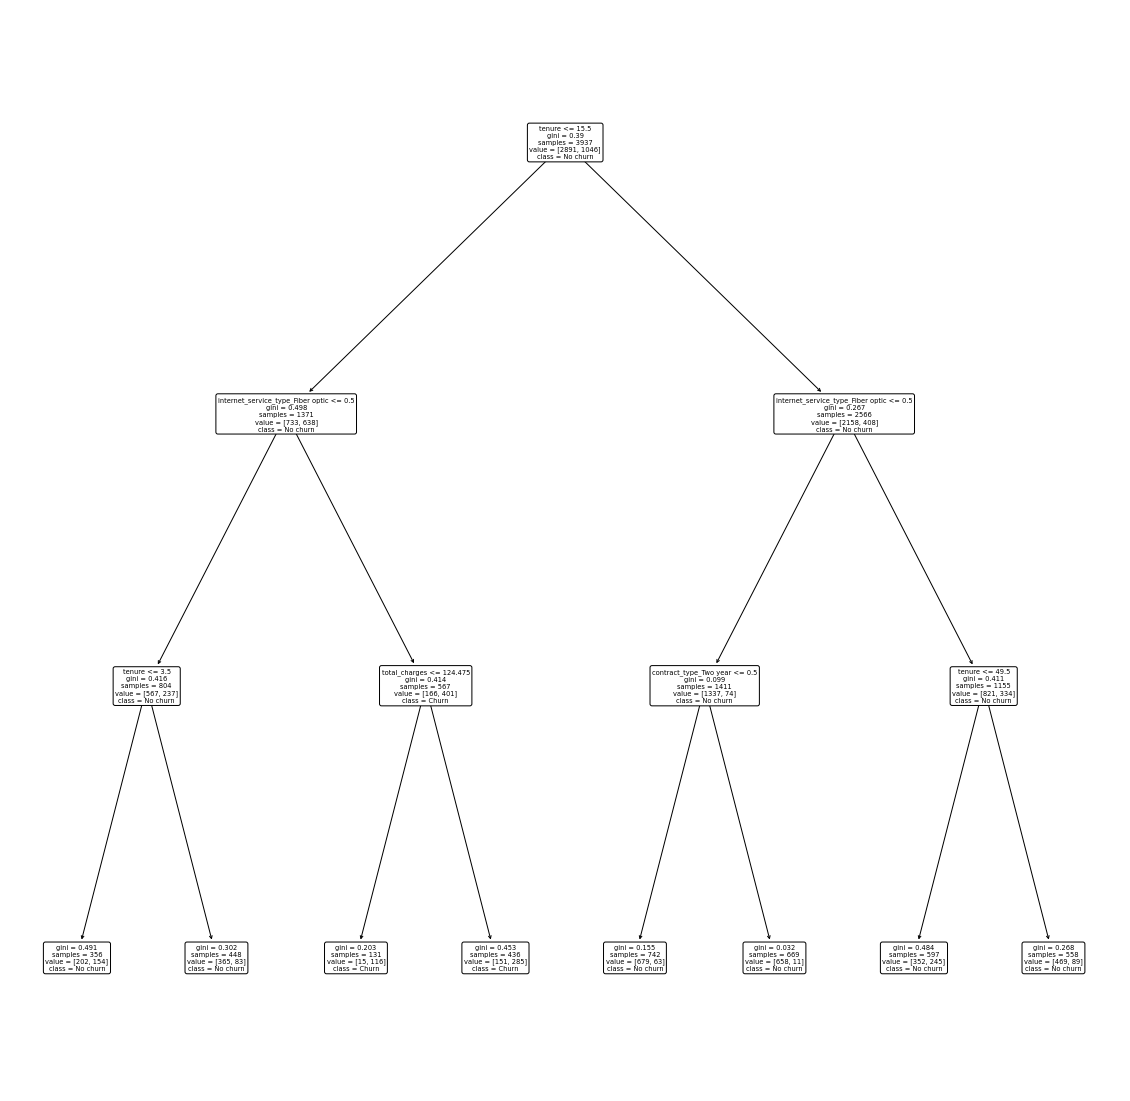

In [138]:
plt.figure(figsize=(20, 20))
plot_tree(clf, feature_names=x_train.columns, class_names=['No churn', 'Churn'], rounded=True)

In [189]:
y_pred = clf.predict(x_train)
y_pred_proba = clf.predict_proba(x_train)

In [164]:
accuracy = clf.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.794)
The True Positive Rate is 0.383, The False Positive Rate is 0.0574,
The True Negative Rate is 0.943, and the False Negative Rate is 0.617

              precision    recall  f1-score      support
0              0.808605  0.942580  0.870468  2891.000000
1              0.707231  0.383365  0.497210  1046.000000
accuracy       0.794006  0.794006  0.794006     0.794006
macro avg      0.757918  0.662973  0.683839  3937.000000
weighted avg   0.781672  0.794006  0.771299  3937.000000


In [181]:
# Some of our inputs seemed rather redundant (like total_charges and tenure), will make a new model dropping 
# some of these features. Also dropping some of the features we know are not largely important.
# Added another max_depth (so 4)

In [142]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float64
 4   gender_Male                            3937 non-null   uint8  
 5   partner_Yes                            3937 non-null   uint8  
 6   dependents_Yes                         3937 non-null   uint8  
 7   phone_service_Yes                      3937 non-null   uint8  
 8   multiple_lines_No phone service        3937 non-null   uint8  
 9   multiple_lines_Yes                     3937 non-null   uint8  
 10  online_security_No internet service    3937 non-null   uint8  
 11  o

In [175]:
x_train2 = x_train.drop(columns=['monthly_charges', 'total_charges', 'senior_citizen',
                                'gender_Male', 'partner_Yes', 'dependents_Yes'])

In [182]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   tenure                                 3937 non-null   int64
 1   phone_service_Yes                      3937 non-null   uint8
 2   multiple_lines_No phone service        3937 non-null   uint8
 3   multiple_lines_Yes                     3937 non-null   uint8
 4   online_security_No internet service    3937 non-null   uint8
 5   online_security_Yes                    3937 non-null   uint8
 6   online_backup_No internet service      3937 non-null   uint8
 7   online_backup_Yes                      3937 non-null   uint8
 8   device_protection_No internet service  3937 non-null   uint8
 9   device_protection_Yes                  3937 non-null   uint8
 10  tech_support_No internet service       3937 non-null   uint8
 11  tech_support_Yes           

In [183]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [184]:
clf2 = clf2.fit(x_train2, y_train)

[Text(558.0, 978.48, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No churn'),
 Text(279.0, 761.0400000000001, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = No churn'),
 Text(139.5, 543.6, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = No churn'),
 Text(69.75, 326.1600000000001, 'device_protection_No internet service <= 0.5\ngini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = No churn'),
 Text(34.875, 108.72000000000003, 'gini = 0.495\nsamples = 203\nvalue = [91, 112]\nclass = Churn'),
 Text(104.625, 108.72000000000003, 'gini = 0.398\nsamples = 153\nvalue = [111, 42]\nclass = No churn'),
 Text(209.25, 326.1600000000001, 'tech_support_No internet service <= 0.5\ngini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = No churn'),
 Text(174.375, 108.72000000000003, 'gini = 0.38\nsamples = 271\nvalue = [202, 69]\nclass = No churn'),
 Text(244.125, 108.72000000000003, 'gini = 

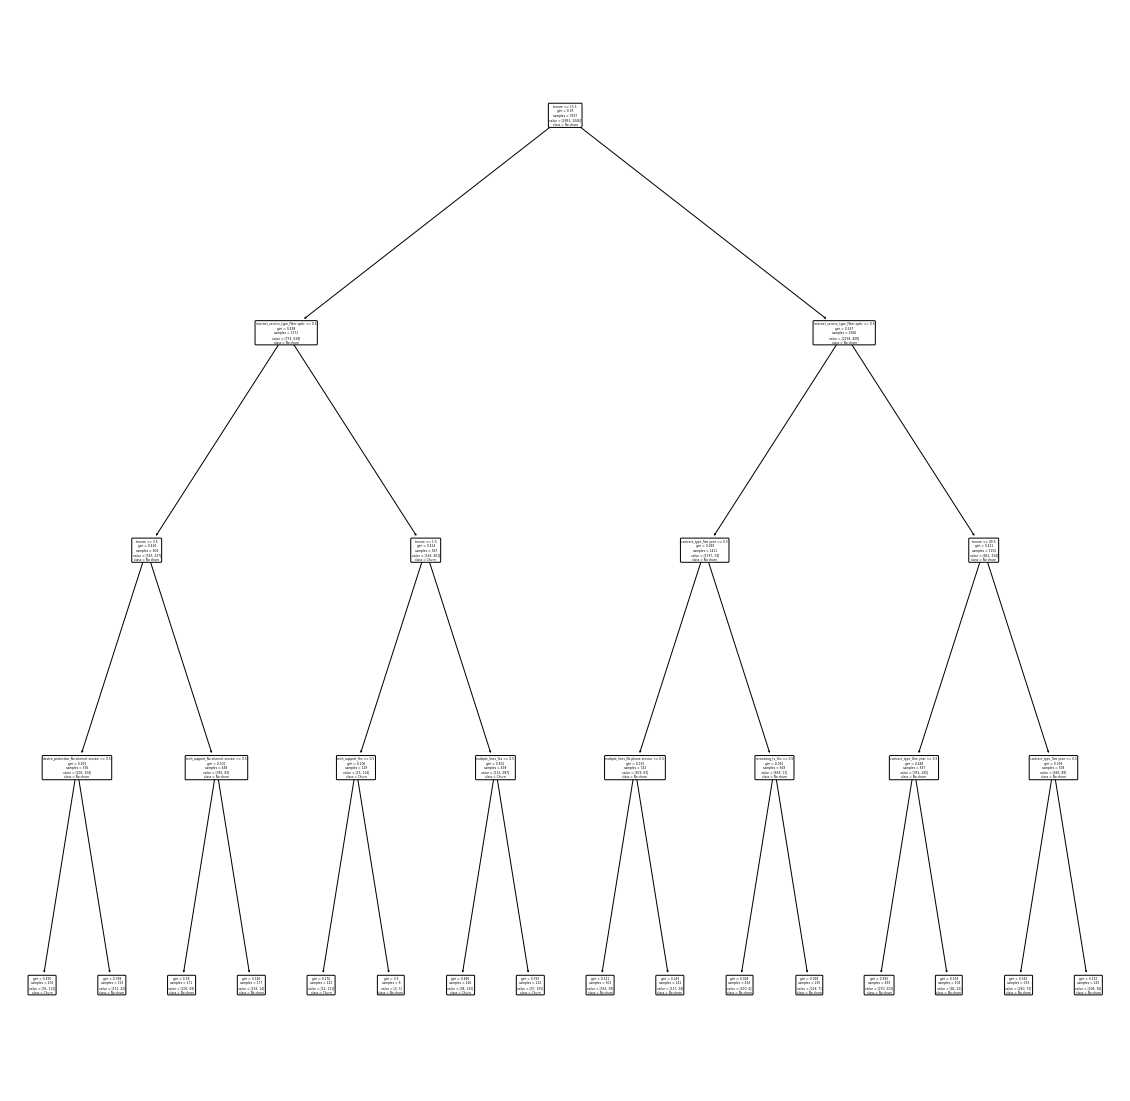

In [185]:
plt.figure(figsize=(20, 20))
plot_tree(clf2, feature_names=x_train2.columns, class_names=['No churn', 'Churn'], rounded=True)

In [188]:
y_pred2 = clf2.predict(x_train2)
y_pred_proba2 = clf2.predict_proba(x_train2)

In [187]:
accuracy = clf2.score(x_train2, y_train)
conf = confusion_matrix(y_train, y_pred2)
class_report = pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred2)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is  0.7993)
The True Positive Rate is 0.488, The False Positive Rate is 0.0879,
The True Negative Rate is 0.912, and the False Negative Rate is 0.512



,precision,recall,f1-score,support
0,0.831075,0.912141,0.869723,2891.00000
1,0.667539,0.487572,0.563536,1046.00000
accuracy,0.799340,0.799340,0.799340,0.79934
macro avg,0.749307,0.699856,0.716629,3937.00000
weighted avg,0.787626,0.799340,0.788374,3937.00000


In [192]:
# Applying validate to the better of the two models (clf2)
x_validate2 = x_validate.drop(columns=['monthly_charges', 'total_charges', 'senior_citizen',
                                'gender_Male', 'partner_Yes', 'dependents_Yes'])

In [194]:
y_pred2_val = clf2.predict(x_validate2)

In [196]:
accuracy = clf2.score(x_validate2, y_validate)
conf = confusion_matrix(y_validate, y_pred2_val)
class_report = pd.DataFrame(classification_report(y_validate, y_pred2_val, output_dict=True)).T
conf = confusion_matrix(y_validate, y_pred2_val)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report


The accuracy for our model is  0.7796)
The True Positive Rate is 0.474, The False Positive Rate is 0.11,
The True Negative Rate is 0.89, and the False Negative Rate is 0.526



,precision,recall,f1-score,support
0,0.823749,0.890234,0.855702,1239.000000
1,0.610315,0.474388,0.533835,449.000000
accuracy,0.779621,0.779621,0.779621,0.779621
macro avg,0.717032,0.682311,0.694768,1688.000000
weighted avg,0.766977,0.779621,0.770087,1688.000000


In [190]:
# Not a lot of difference between the two (only real change is max_depth from 3 to 4), will try other models

In [197]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3,
                           n_estimators=100, max_depth=3, random_state=123)

In [198]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [199]:
print(rf.feature_importances_)

[0.00113905 0.18981544 0.06289304 0.10640952 0.00019834 0.00462027
 0.00187421 0.00049088 0.00035801 0.00170827 0.02028871 0.04186
 0.02195636 0.00744465 0.01506165 0.00684958 0.02591715 0.02990474
 0.02821763 0.00074649 0.02247787 0.0012865  0.01156173 0.148387
 0.03662601 0.02452828 0.10681359 0.00318283 0.07621896 0.00116324]


In [200]:
y_pred = rf.predict(x_train)

In [201]:
y_pred_proba = rf.predict_proba(x_train)

In [202]:
accuracy = rf.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.7894)
The True Positive Rate is 0.315, The False Positive Rate is 0.0387,
The True Negative Rate is 0.961, and the False Negative Rate is 0.685

              precision    recall  f1-score      support
0              0.794908  0.961259  0.870205  2891.000000
1              0.746032  0.314532  0.442502  1046.000000
accuracy       0.789434  0.789434  0.789434     0.789434
macro avg      0.770470  0.637895  0.656353  3937.000000
weighted avg   0.781923  0.789434  0.756571  3937.000000


In [203]:
rf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=2,
                           n_estimators=100, max_depth=8, random_state=123)

In [204]:
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)

In [205]:
print(rf2.feature_importances_)

[0.01169481 0.1979913  0.10844181 0.16762621 0.01133537 0.01107991
 0.00806538 0.00352591 0.0039555  0.01140898 0.01060112 0.03103211
 0.01212065 0.01285065 0.0065232  0.00777294 0.01359155 0.02902908
 0.01430188 0.00704464 0.01219368 0.00781784 0.01771123 0.10183369
 0.01667334 0.03196127 0.06856836 0.00798511 0.04849282 0.00676967]


In [206]:
y_pred = rf2.predict(x_train)

In [207]:
y_pred_proba = rf2.predict_proba(x_train)

In [208]:
accuracy = rf2.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.8364)
The True Positive Rate is 0.565, The False Positive Rate is 0.0654,
The True Negative Rate is 0.935, and the False Negative Rate is 0.435

              precision    recall  f1-score      support
0              0.855876  0.934625  0.893519  2891.000000
1              0.757692  0.565010  0.647317  1046.000000
accuracy       0.836424  0.836424  0.836424     0.836424
macro avg      0.806784  0.749817  0.770418  3937.000000
weighted avg   0.829790  0.836424  0.828106  3937.000000


In [233]:
rf3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=2,
                           n_estimators=100, max_depth=10, random_state=123)

In [234]:
rf3.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [235]:
y_pred = rf3.predict(x_train)

In [236]:
y_pred_proba = rf3.predict_proba(x_train)

In [237]:
accuracy = rf3.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.87
The True Positive Rate is 0.66, The False Positive Rate is 0.054,
The True Negative Rate is 0.946, and the False Negative Rate is 0.34

              precision    recall  f1-score      support
0              0.884827  0.946039  0.914410  2891.000000
1              0.815603  0.659656  0.729387  1046.000000
accuracy       0.869952  0.869952  0.869952     0.869952
macro avg      0.850215  0.802848  0.821898  3937.000000
weighted avg   0.866435  0.869952  0.865252  3937.000000


In [238]:
rf3.fit(x_validate, y_validate)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [239]:
y_pred = rf3.predict(x_validate)

In [240]:
y_pred_proba = rf3.predict_proba(x_validate)

In [241]:
accuracy = rf3.score(x_validate, y_validate)
conf = confusion_matrix(y_validate, y_pred)
class_report = pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)).T
conf = confusion_matrix(y_validate, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.9034)
The True Positive Rate is 0.715, The False Positive Rate is 0.0282,
The True Negative Rate is 0.972, and the False Negative Rate is 0.285

              precision    recall  f1-score      support
0              0.903904  0.971751  0.936601  1239.000000
1              0.901685  0.714922  0.797516   449.000000
accuracy       0.903436  0.903436  0.903436     0.903436
macro avg      0.902795  0.843337  0.867058  1688.000000
weighted avg   0.903314  0.903436  0.899605  1688.000000


In [242]:
# rf3 outperformed the others, due to a much larger max_depth and shortest min_samples_leaf metric.
# The out of sample (validate) evaluation outperformed the in sample (train).

In [243]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [244]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [245]:
y_pred = knn.predict(x_train)

In [246]:
y_pred_proba = knn.predict_proba(x_train)

In [247]:
accuracy = knn.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.8321)
The True Positive Rate is 0.586, The False Positive Rate is 0.0789,
The True Negative Rate is 0.921, and the False Negative Rate is 0.414

              precision    recall  f1-score      support
0              0.860142  0.921135  0.889594  2891.000000
1              0.728894  0.586042  0.649709  1046.000000
accuracy       0.832106  0.832106  0.832106     0.832106
macro avg      0.794518  0.753588  0.769651  3937.000000
weighted avg   0.825272  0.832106  0.825860  3937.000000


In [248]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [249]:
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [250]:
y_pred = knn2.predict(x_train)

In [251]:
y_pred_proba = knn2.predict_proba(x_train)

In [252]:
accuracy = knn2.score(x_train, y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.8103)
The True Positive Rate is 0.414, The False Positive Rate is 0.0464,
The True Negative Rate is 0.954, and the False Negative Rate is 0.586

              precision    recall  f1-score      support
0              0.818101  0.953649  0.880690  2891.000000
1              0.763668  0.413958  0.536888  1046.000000
accuracy       0.810262  0.810262  0.810262     0.810262
macro avg      0.790885  0.683804  0.708789  3937.000000
weighted avg   0.803639  0.810262  0.789347  3937.000000


In [253]:
# There is some potential here, perhaps if the data is further gleaned of the less important columns will 
# come back to KNN 

In [254]:
# Going to play with some feature modifications based on explore/models we have seen already

In [255]:
x_train.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,0,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1915,0,71,85.45,6028.95,1,0,1,1,0,1,...,0,0,1,1,0,1,0,1,0,0


In [256]:
# Add a column to account for no contract
x_train['no_contract'] = ((x_train['contract_type_One year']) == 0 & (x_train['contract_type_Two year'] == 0))

In [273]:
x_validate['no_contract'] = ((x_validate['contract_type_One year']) == 0 & (x_validate['contract_type_Two year'] == 0))
x_test['no_contract'] = ((x_test['contract_type_One year']) == 0 & (x_test['contract_type_Two year'] == 0))

In [274]:
x_train.no_contract = x_train.no_contract.astype(int)
x_validate.no_contract = x_validate.no_contract.astype(int)
x_test.no_contract = x_test.no_contract.astype(int)

In [264]:
features1 = ['tenure', 'internet_service_type_Fiber optic', 'payment_type_Electronic check', 'no_contract']

In [265]:
logit1 = LogisticRegression(random_state=123)

In [266]:
logit1.fit(x_train[features1], y_train)

LogisticRegression(random_state=123)

In [267]:
y_pred = logit1.predict(x_train[features1])

In [268]:
accuracy = logit1.score(x_train[features1], y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.7945)
The True Positive Rate is 0.472, The False Positive Rate is 0.0889,
The True Negative Rate is 0.911, and the False Negative Rate is 0.528

              precision    recall  f1-score      support
0              0.826742  0.911103  0.866875  2891.000000
1              0.657790  0.472275  0.549805  1046.000000
accuracy       0.794514  0.794514  0.794514     0.794514
macro avg      0.742266  0.691689  0.708340  3937.000000
weighted avg   0.781854  0.794514  0.782635  3937.000000


In [275]:
def evaluate_model(c):
    model = LogisticRegression(C=c)
    model.fit(x_train, y_train)
    accuracy = model.score(x_validate, y_validate)
    coefs = dict(zip(x_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

In [276]:
models = [evaluate_model(c) for c in [.0001, .001, .01, .1, 1, 10, 100, 1000]]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [277]:
(pd.DataFrame(models).round(4)
  .set_index(['C', 'accuracy'])
  .style
  .set_caption('Effect of difference C values on accuracy (t=.5) and the resulting coefficients.')
  .set_precision(3)
)

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_9535/2465912498.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (pd.DataFrame(models).round(4)


,,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,no_contract
C,accuracy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0001,0.7749,0.006,-0.049,0.032,-0.000,-0.000,-0.001,-0.004,-0.004,0.003,0.003,-0.002,-0.008,-0.002,-0.002,-0.002,-0.003,-0.002,-0.008,-0.002,-0.002,-0.002,-0.001,0.007,0.007,-0.002,-0.005,-0.006,-0.002,0.008,-0.004,0.005
0.001,0.7814,0.052,-0.067,0.026,0.000,0.003,0.009,-0.018,-0.055,0.046,0.025,-0.021,-0.074,-0.021,-0.021,-0.021,-0.017,-0.021,-0.064,-0.021,-0.014,-0.021,-0.003,0.050,0.072,-0.021,-0.050,-0.075,-0.014,0.039,-0.014,0.041
0.01,0.7974,0.207,-0.078,0.008,0.000,-0.048,-0.025,-0.144,-0.169,0.038,0.154,-0.119,-0.308,-0.119,-0.098,-0.119,-0.103,-0.119,-0.291,-0.119,-0.044,-0.119,-0.017,0.201,0.303,-0.119,-0.184,-0.198,-0.081,0.232,-0.207,0.054
0.1,0.798,0.312,-0.072,0.005,0.000,-0.044,-0.021,-0.199,-0.229,0.061,0.234,-0.140,-0.476,-0.140,-0.155,-0.140,-0.158,-0.140,-0.446,-0.140,-0.074,-0.140,-0.033,0.314,0.458,-0.140,-0.288,-0.306,-0.119,0.337,-0.276,0.120
1.0,0.795,0.332,-0.067,0.005,0.000,-0.013,0.085,-0.126,-0.444,0.221,0.245,-0.136,-0.619,-0.136,-0.189,-0.136,-0.092,-0.136,-0.492,-0.136,-0.027,-0.136,0.030,0.333,0.683,-0.136,-0.405,-0.637,-0.092,0.137,-0.136,0.182
10.0,0.7944,0.332,-0.069,0.005,0.000,-0.014,0.086,-0.126,-0.447,0.222,0.245,-0.137,-0.622,-0.137,-0.190,-0.137,-0.091,-0.137,-0.493,-0.137,-0.025,-0.137,0.032,0.332,0.686,-0.137,-0.406,-0.643,-0.091,0.133,-0.135,0.181
100.0,0.7962,0.349,-0.063,0.005,0.000,-0.015,0.087,-0.134,-0.462,0.229,0.258,-0.142,-0.650,-0.142,-0.199,-0.142,-0.099,-0.142,-0.518,-0.142,-0.029,-0.142,0.031,0.350,0.714,-0.142,-0.424,-0.665,-0.097,0.148,-0.145,0.191
1000.0,0.7986,0.338,-0.075,0.003,0.001,-0.028,-0.001,-0.195,-0.258,0.088,0.254,-0.125,-0.537,-0.125,-0.175,-0.125,-0.164,-0.125,-0.490,-0.125,-0.078,-0.125,-0.031,0.345,0.522,-0.125,-0.329,-0.376,-0.123,0.331,-0.257,0.159


In [278]:
features2 = ['senior_citizen', 'phone_service_Yes', 'online_security_Yes', 'tech_support_Yes', 'paperless_billing_Yes',
            'internet_service_type_Fiber optic', 'contract_type_One year', 'contract_type_Two year']

In [288]:
logit2 = LogisticRegression(random_state=123)

In [289]:
logit2.fit(x_train[features2], y_train)

LogisticRegression(random_state=123)

In [290]:
y_pred = logit2.predict(x_train[features2])

In [291]:
accuracy = logit2.score(x_train[features2], y_train)
conf = confusion_matrix(y_train, y_pred)
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
conf = confusion_matrix(y_train, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy: .4})
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
print(class_report)


The accuracy for our model is  0.7859)
The True Positive Rate is 0.579, The False Positive Rate is 0.139,
The True Negative Rate is 0.861, and the False Negative Rate is 0.421

              precision    recall  f1-score      support
0              0.849727  0.860602  0.855130  2891.000000
1              0.600595  0.579350  0.589781  1046.000000
accuracy       0.785878  0.785878  0.785878     0.785878
macro avg      0.725161  0.719976  0.722455  3937.000000
weighted avg   0.783536  0.785878  0.784631  3937.000000
